## Example-1

### 1. Import the Libraries

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import tree
import matplotlib.pyplot as plt

### 2. Load the Dataset

In [2]:
# Load training and test datasets
df_train = pd.read_csv("buy_comp_train_data.csv")
df_test = pd.read_csv("buy_comp_test_data.csv")

In [3]:
df_train.head()

,Age,Income,Student,Credit Rating,Buy Comp
0,<=30,High,No,Fair,No
1,<=30,High,No,Exc,No
2,31-40,High,No,Fair,Yes
3,>40,Med,No,Fair,Yes
4,>40,Low,Yes,Fair,Yes


In [4]:
df_test.head()

,Age,Income,Student,Credit Rating,Buy Comp
0,<=30,Med,Yes,Fair,Unknown
1,>40,High,No,Exc,Unknown


### 3. One-Hot Encoding and Restoring Target Variable

In [5]:
# Converting categorical variables to numerical using one-hot encoding
df_encoded_train = pd.get_dummies(df_train.drop('Buy Comp', axis=1))
df_encoded_test = pd.get_dummies(df_test.drop('Buy Comp', axis=1))

# Align the columns in the test set to match the train set
df_encoded_test = df_encoded_test.reindex(columns=df_encoded_train.columns, fill_value=0)

# After One hot encoding again add target column
df_encoded_train['Buy Comp'] = df_train['Buy Comp']  
df_encoded_test['Buy Comp'] = df_test['Buy Comp']

### 4. Splitting Features and Target for Training and Testing

In [6]:
# Split features and target
X_train = df_encoded_train.drop('Buy Comp', axis=1)  # Features
y_train = df_encoded_train['Buy Comp']  # Target

# In the test set, we don't have the target, so just use the features
X_test = df_encoded_test.drop('Buy Comp', axis=1)

### 5. Train the Decision Tree Classifier

In [7]:
# Train the Decision Tree Classifier
clf = DecisionTreeClassifier(criterion='entropy', random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

### 6. Vizualise the Tree

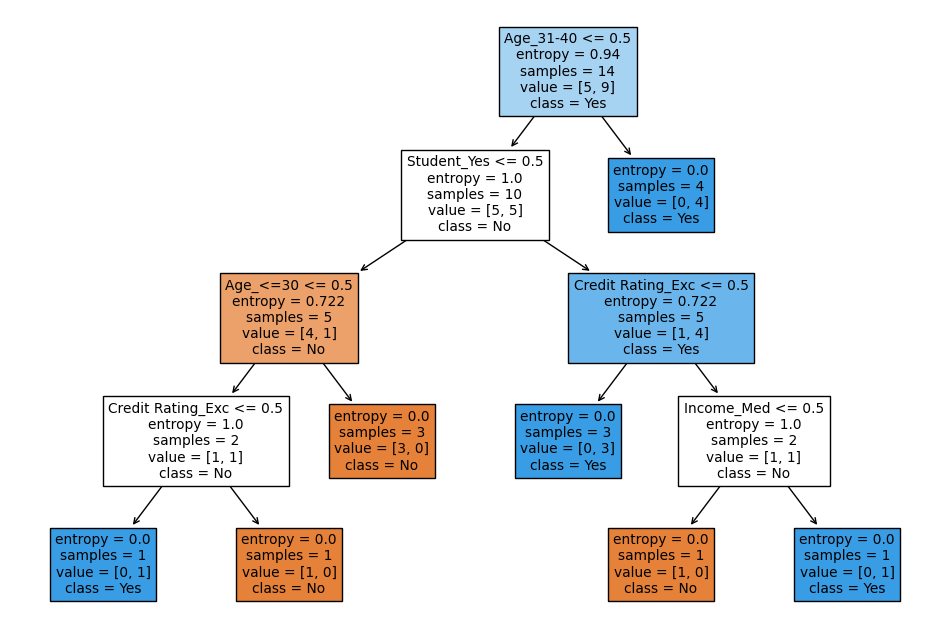

In [9]:
plt.figure(figsize=(12, 8))
tree.plot_tree(
    clf,
    feature_names=X_train.columns.tolist(),  # Convert Index to list
    class_names=['No', 'Yes'],
    filled=True
)
plt.show()

### 7. Predict the test set results

In [10]:
# Predict the test set results
y_pred = clf.predict(X_test)
print(y_pred)

['Yes' 'No']


## Example-2

### 1. Import the Libraries

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import tree
import matplotlib.pyplot as plt

### 2. Load the Datasets

In [12]:
df = pd.read_csv("play_tennis_full.csv")
print(len(df))
df.head()

18


,Outlook,Temperature,Humidity,Wind,PlayTennis
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Mild,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes


### 3. Binary encoding the target variable

In [13]:
# Converting categorical variables to numerical using one-hot encoding
df_encoded = pd.get_dummies(df.drop('PlayTennis', axis=1))
df_encoded['PlayTennis'] = df['PlayTennis'].map({'Yes': 1, 'No': 0})  # Binary encoding for the target

X = df_encoded.drop('PlayTennis', axis=1)  # Features
y = df_encoded['PlayTennis']  # Target

### 4. Splitting the data into test and train sets

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [15]:
X_test

,Outlook_Overcast,Outlook_Rain,Outlook_Sunny,Temperature_Cool,Temperature_Hot,Temperature_Mild,Humidity_High,Humidity_Normal,Wind_Strong,Wind_Weak
0,0,0,1,0,1,0,1,0,0,1
1,0,0,1,0,1,0,1,0,1,0
8,0,0,1,1,0,0,0,1,0,1
5,0,1,0,1,0,0,0,1,1,0
3,0,1,0,0,0,1,1,0,0,1
13,0,1,0,0,0,1,1,0,1,0


### 5. Using the built-in function for decision tree classifier

In [16]:
# Train the Decision Tree Classifier
clf = DecisionTreeClassifier(criterion='entropy', random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

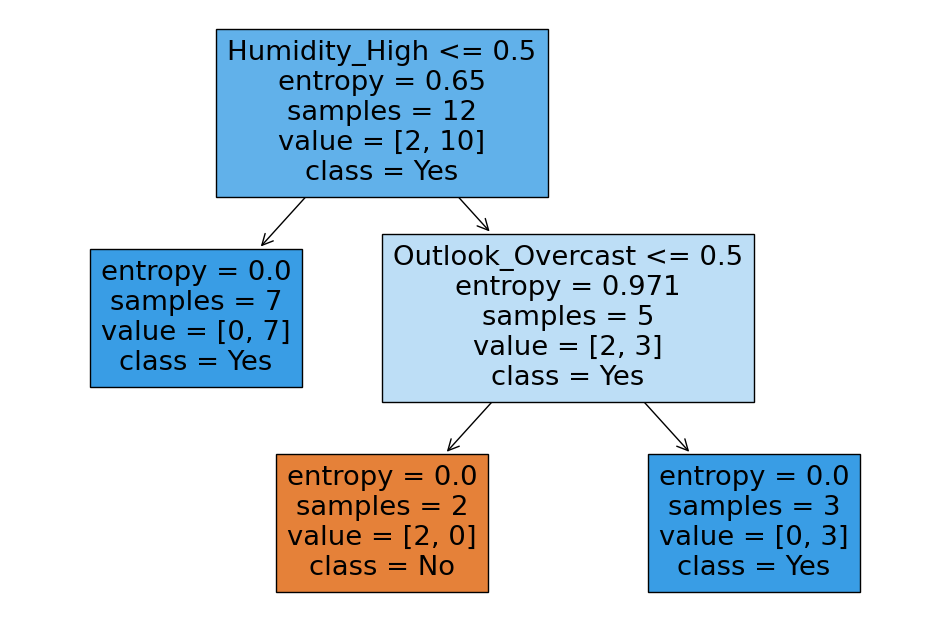

In [18]:
plt.figure(figsize=(12,8))
tree.plot_tree(clf, feature_names=X.columns.tolist(), class_names=['No', 'Yes'], filled=True)
plt.show()


### 6. Model Prediction

In [19]:
# Predict the test set results
y_pred = clf.predict(X_test)
y_pred

array([0, 0, 1, 1, 0, 0], dtype=int64)

### 7. Model Evaluation

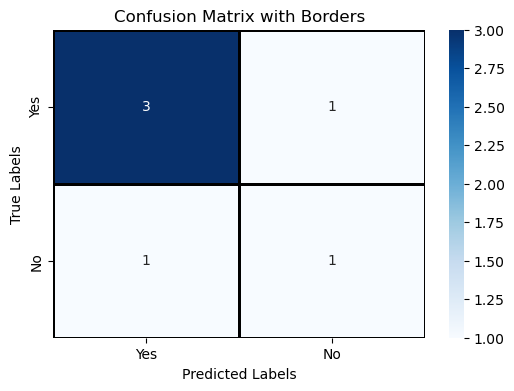

In [20]:
import seaborn as sns
import numpy as np

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Create a heatmap for the confusion matrix with borders
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt='g', 
            xticklabels=['Yes', 'No'], 
            yticklabels=['Yes', 'No'], 
            linewidths=0.8, linecolor='black')

# Add titles and labels
plt.title('Confusion Matrix with Borders')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

# Show the plot
plt.show()

In [21]:
# Evaluate the model
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.75      0.75         4
           1       0.50      0.50      0.50         2

    accuracy                           0.67         6
   macro avg       0.62      0.62      0.62         6
weighted avg       0.67      0.67      0.67         6



In [22]:
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.75      0.75         4
           1       0.50      0.50      0.50         2

    accuracy                           0.67         6
   macro avg       0.62      0.62      0.62         6
weighted avg       0.67      0.67      0.67         6



## Example-3

### 1. Import the Libraries

In [23]:
# Load a sample dataset using sklearn 
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import tree
import matplotlib.pyplot as plt
import numpy as np
iris = load_iris()

### 2. Load the Datasets

In [24]:
# Create a DataFrame
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target
print(len(df))
df.head()

150


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### 3. Binary encoding the target variable

In [25]:
df_encoded = pd.get_dummies(df.drop('target', axis=1))
df_encoded['target'] = df['target'].map({0: 'Setosa', 1: 'Versicolor',2:'Virginica'}) 
X = df_encoded.drop('target', axis=1)  # Features
y = df_encoded['target']  # Target

### 4. Splitting the Datasets into Train and Test set

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

### 5. Train the Classifier

In [27]:
# Train the Decision Tree Classifier
clf = DecisionTreeClassifier(criterion='entropy', random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

### 6. Predict and evalaute the model

In [28]:
# Predict the test set results
y_pred = clf.predict(X_test)
y_pred

array(['Versicolor', 'Setosa', 'Virginica', 'Versicolor', 'Versicolor',
       'Setosa', 'Versicolor', 'Virginica', 'Versicolor', 'Versicolor',
       'Virginica', 'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Versicolor',
       'Virginica', 'Versicolor', 'Versicolor', 'Virginica', 'Setosa',
       'Virginica', 'Setosa', 'Virginica', 'Virginica', 'Virginica',
       'Virginica', 'Virginica', 'Setosa', 'Setosa'], dtype=object)

### 7. Evaluate the Model

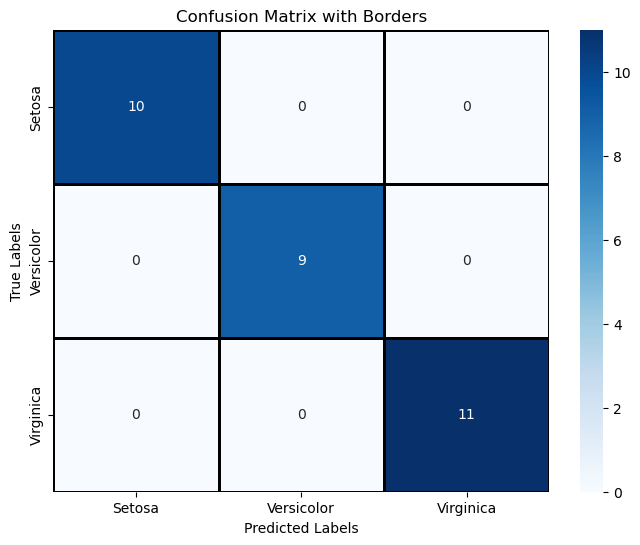

In [29]:
# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Create a heatmap for the confusion matrix with borders
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt='g', 
            xticklabels=['Setosa', 'Versicolor', 'Virginica'], 
            yticklabels=['Setosa', 'Versicolor', 'Virginica'], 
            linewidths=0.8, linecolor='black')

# Add titles and labels
plt.title('Confusion Matrix with Borders')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

# Show the plot
plt.show()


In [30]:
# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 1.0


In [31]:
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        10
  Versicolor       1.00      1.00      1.00         9
   Virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



### 8. Visualizing the Decision Tree

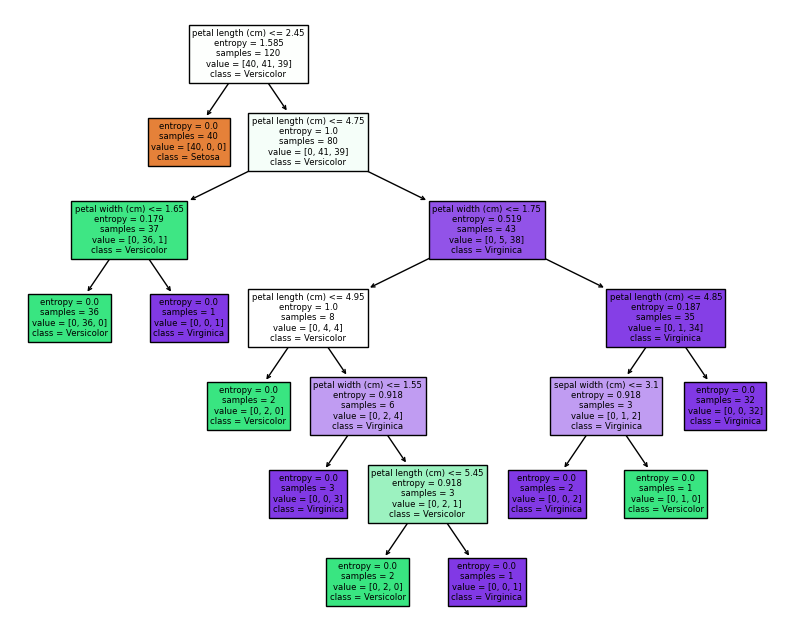

In [33]:
plt.figure(figsize=(10,8))
tree.plot_tree(clf, feature_names=X.columns.tolist(), class_names=['Setosa', 'Versicolor','Virginica' ], filled=True)
plt.show()

## Example-4:

In [34]:
df = pd.read_csv("House_Data.csv")
print(len(df))
df.head()

21613


,Id,Size (sqft),Number of Bedrooms,Number of Floors,Age of Home,Price (1000s dollars)
0,7129300520,1180,3,1,85,221.9
1,6414100192,2570,3,2,89,538.0
2,5631500400,770,2,1,107,180.0
3,2487200875,1960,4,1,75,604.0
4,1954400510,1680,3,1,53,510.0


In [35]:
df = df.drop('Id', axis=1)
df.head()

,Size (sqft),Number of Bedrooms,Number of Floors,Age of Home,Price (1000s dollars)
0,1180,3,1,85,221.9
1,2570,3,2,89,538.0
2,770,2,1,107,180.0
3,1960,4,1,75,604.0
4,1680,3,1,53,510.0
